# CS166 Session 13.2 PCW 

## Experimentally confirm: 

$$ p_i > \frac{p_r}{(n-1)p_e} = \frac{p_r}{\left< k \right>} $$

### a. Sayama Exercise 18.5

In [1]:
import matplotlib as plt 
from pylab import *
import networkx as nx
import random as rd

def initialize(n, p):
    global g
#     g = nx.karate_club_graph()
    g = nx.erdos_renyi_graph(n, p)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)



def update():
    global g
    
    # create copy 
    h = g 
    
    for node in list(h.nodes):
        a = node
        if h.nodes[a]['state'] == 0: # if susceptible
            b = rd.choice(list(h.neighbors(a)))
            if h.nodes[b]['state'] == 1: # if neighbor b is infected
                h.nodes[a]['state'] = 1 if random() < p_i else 0
        else: # if infected
            h.nodes[a]['state'] = 0 if random() < p_r else 1

    
    # update network 
    
    g = h 

Ratio = 0.5 : 0.05122950819672131


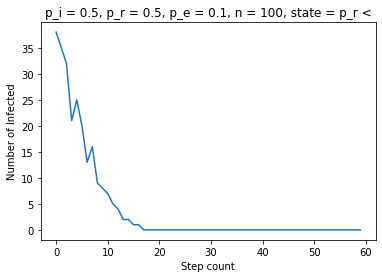

Ratio = 0.04 : 0.05


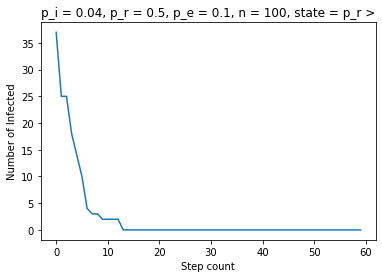

Ratio = 0.04 : 0.02450980392156863


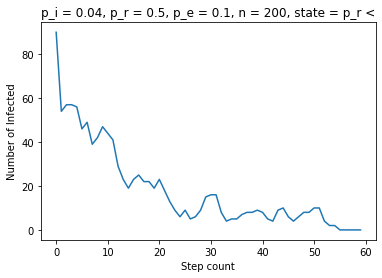

Ratio = 0.04 : 0.050505050505050504


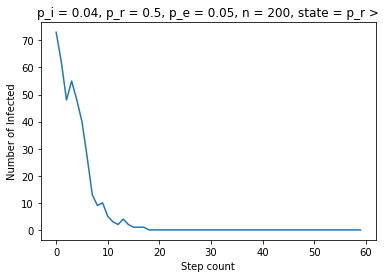

In [2]:
p_i = 0.5 # infection probability
p_r = 0.5 # recovery probability
p_e = 0.1
n = 100

def plot_sim(p_i, p_r, p_e, n):
    

    initialize(n, p_e)

    infection_trend = []

    for i in range(60):
        update()
        state_vals = [_ for _ in dict(g.nodes(data = 'state')).values()]

        infection_trend.append(sum(state_vals))
    update()

    # observe()
    # plt.show()


    avg_degrees = np.mean([n[1] for n in g.degree()])
    
    print(f'Ratio = {p_i} : {p_r/avg_degrees}')

    if p_r < ((n-1) * p_e * p_i):
        state = 'p_r <'
        
    else:
        state = 'p_r >'

    plt.plot(infection_trend)
    plt.ylabel("Number of Infected")
    plt.xlabel("Step count")
    plt.title(f'p_i = {p_i}, p_r = {p_r}, p_e = {p_e}, n = {n}, state = {state}')
    plt.show()

    
num_samples = [100, 100, 200, 200]
prob_edge = [0.1, 0.1, 0.1, 0.05]
prob_infected = [0.5, 0.04, 0.04, 0.04]
prob_recovery = [0.5, 0.5, 0.5, 0.5]

for i in range(len(num_samples)):
    plot_sim(prob_infected[i], prob_recovery[i], prob_edge[i], num_samples[i])

    


### Why Snychronus? 

It helps us simulate the entire network in one instance. Since all nodes are literally connected, the probability of infection, recovery and being connected becomes more accurate for portraying the network effects of the model. 

### Why is it better for MFA?

MFA uses a macro-perspective when it comes to analyzing the simulation (CA or network). With a synchronus updating method, we follow this rule and applies the probabilities set for infection, recovery and connectedness for all nodes. Therefore, we can observe and see how the MFA actually show in our empirical results. 

## Experimentailly confirm the "your friends have more friends than you do"

In [3]:
def get_avg_degree(g):
    
    return np.mean([n[1] for n in g.degree()])

def get_nb_avg_degree(g):
    
    neighbors = []
    
    for edge in list(g.edges()):
        node1 = len(list(g.neighbors(edge[0])))
        node2 = len(list(g.neighbors(edge[1])))
        
        neighbors.append(np.mean(node1 + node2))
        
    return np.round(np.mean(neighbors),3)
        


In [4]:
n = 1000

ER = nx.erdos_renyi_graph(n, 0.0399999)
WS = nx.watts_strogatz_graph(n, 40, 0.5)
BA = nx.barabasi_albert_graph(n, 21)

print("MY AVG. NUMBER OF FRIENDS")

ER_avg_degree = get_avg_degree(ER)
WS_avg_degree = get_avg_degree(WS)
BA_avg_degree = get_avg_degree(BA)

print("ER avg. degree =",ER_avg_degree, "avg. edges =", len(ER.edges()))
print("WS avg. degree = ", WS_avg_degree, "avg. edges =", len(WS.edges()))
print("BA avg. degree = ", BA_avg_degree, "avg. edges =", len(BA.edges()))

print("-----")
print("AVG. NUMBER OF FRIENDS OF MY FRIENDS")
ER_avg_degree = get_nb_avg_degree(ER)
WS_avg_degree = get_nb_avg_degree(WS)
BA_avg_degree = get_nb_avg_degree(BA)

print("ER avg. degree of neighbours =",ER_avg_degree, "avg. edges =", len(ER.edges()))
print("WS avg. degree of neighbours = ", WS_avg_degree, "avg. edges =", len(WS.edges()))
print("BA avg. degree of neighbours = ", BA_avg_degree, "avg. edges =", len(BA.edges()))

MY AVG. NUMBER OF FRIENDS
ER avg. degree = 39.284 avg. edges = 19642
WS avg. degree =  40.0 avg. edges = 20000
BA avg. degree =  41.118 avg. edges = 20559
-----
AVG. NUMBER OF FRIENDS OF MY FRIENDS
ER avg. degree of neighbours = 80.439 avg. edges = 19642
WS avg. degree of neighbours =  80.752 avg. edges = 20000
BA avg. degree of neighbours =  126.653 avg. edges = 20559


#### Question: How does the average degree of neigbbors (the number of friends of your friends) compare to the acerage degree of th graph (your number of friends)? 

The difference is quite surprising. For ER and WS networks, the average number of friends of my friends are TWICE as bigger as my own average number of friends. 

For the BA network, the average number of friends of my friends are THRICE as bigger as my own average number of friends. 